# Accreting Black Holes

## 0. GENERAL BACKGROUND

Binary star systems consist of two stars that orbit one another. Depending on the mass of these stars, one or more of them may explode in a supernova and form a black hole late in their lifetime. This is generally the case for stars with initial masses greater than 20 times that of the sun, or 20 solar masses ($M_\odot$).

In the majority of these binary systems, black hole formation occurs asynchronously. This implies that the binary undergoes a period time where one object is a black hole and one object is still a star. This stage of evolution is called the x-ray binary phase, and the system is referred to as an **x-ray binary**.

Why do we call these systems x-ray binaries? During this evolutionary stage, the black hole accretes matter from its companion star due to its strong gravitational pull. The accretion process heats transferred material through gravitational and frictional forces, which in turn triggers the emission of x-rays. Below is a helpful illustration of this process:

![HMXB_illustration](https://github.com/CIERA-Northwestern/REACHpy/blob/main/Projects/AccretingBlackHoles/HMXB_illustration.jpg?raw=1)

Because the matter surrounding these black holes emits brightly in the x-ray band of the electromagnetic spectrum, x-ray observatories (such as the Chandra Observatory) search for this emission to identify binary systems that house black holes. The brightness, or luminosity, that astronomers observe in these binaries is called the **accretion luminosity**, as it is the luminosity that results from the accretion process of stellar material onto the black hole. These observations help astronomers learn about the properties of these systems and predict their possible courses of evolution. For example, some astronomers are interested in finding systems like these that will eventually form colliding black holes, which can be observed with gravitational wave detections.

In this project, we will take a closer look at how we can predict the luminosity of these black hole systems using computational methods and data from simulations.  Theoretical calculations like these help astronomers target their observations towards certain luminosities so that they can better identify these systems in the sky. These calculations also help astronomers compare their theoretical predictions with observations so that they can better understand if there are flaws in their theoretical or observational methods.

## 1. INTRODUCTION AND DEFINITIONS

### 1.1  Some theoretical background
As it turns out, black holes are not necessarily entirely dark!

Indeed, black holes that are being feed material are able to emit light by a process that we call **"mass-to-energy conversion"**. In this process, a black hole is able to *accrete* (that is, increase its mass) via an **accretion disk** that transports material from large distances all the way down to the edge of the black hole, near its **event horizon**. By being moved around, the material loses energy, which is released in the form of emitted light. Therefore, the amount of light emitted -- which we call the **accretion luminosity** $L_{\rm acc}$-- must be proportional to the so-called accretion rate of the disk  $\dot{M}_{\rm acc}$. In order to fall into the black hole, the material loses *so much energy*, that this must be released at the expense of the material's own (rest) mass. This process literally converts mass into light!

If we put it into equation form:

$L_{\rm acc} = \eta \dot{M}_{\rm acc}c^2$

where $c$ is the speed of light and $\eta$ is a scale factor which represents the **efficiency of mass-to-energy conversion**.

As black holes evolve and increase their mass via accretion, their efficiency $\eta$ is thought to increase as well (the reasons are beyond the scope of this project, but they have to do with the black hole being spun up as it grows in mass, and spinning black holes are more efficient at converting mass into energy than non-spinning ones). An approximate way to relate the evolving efficiency to the evolving black hole mass is:

$$\eta = 1 - \sqrt{1 - \bigg(\frac{M_{\rm BH}}{3M_{\rm BH,0}}\bigg)^2}$$

Since mass is literally being converted into light, it turns out the the black hole doesn't get to eat all the mass that was originally fed to it from a large distance. Instead, the black hole only accretes the material that **was not** converted into light. Or, in equation form,

$$ \dot{M}_{\rm BH} = \dot{M}_{\rm acc}(1 - \eta)$$


You will need to use (and understand!) these three equations to carry out the following research project.

### 1.2 Defining your own Python functions
First, we need to write a function that calculates and returns the accretion luminosity of a black hole in a binary system. We need something like the following:

```python
def calc_Lacc(<function arguments>):

  < calculate Lacc using the above formulae >

  return Lacc
```

The parameters being fed to our function are $M_{\rm BH}$, $M_{\rm BH,0}$, and $\dot{M}_{\rm BH}$ (see definitions above). And we need the function to output $L_{\rm acc}$ according to the equation above. Thus we need something like:
```python
def calc_Lacc(Mbh,Mbh0,Mdotbh):

  Lacc = eta * Mdotacc * c**2

  return Lacc
```
where you we need to look up the value of ``c``. But most importantly, we also need to know where ``eta`` and ``Mdotacc`` come from!

So, a more complete definition of the function is something that may look like:

```python
def calc_Lacc(Mbh,Mbh0,Mdotbh):
  eta = 1 - (1 - (Mbh/3/Mbh0)**2)**0.5
  Mdotacc = Mdotbh/(1- eta)
  Lacc = eta * Mdotacc * c**2

  return Lacc
```


Now it's your turn to make this function work.

In [ ]:
def calc_Lacc(Mbh,Mbh0,Mdotbh):
    eta = 1 - (1 - (Mbh/3/Mbh0)**2)**0.5
    Mdotacc = Mdotbh/(1- eta)
    Lacc = eta * Mdotacc * c**2

    return Lacc

Note that ``eta`` and ``Mdotacc`` are computed from other quantities, so they can be defined as functions themselves!
Now, try something like this:

```python
def calc_eta( <...>):
  <...>
  return eta

def calc_Mdotacc( <...>):
  <...>
  return Mdotacc


def calc_Lacc( <...>):
  <...>
  Lacc = calc_eta(<...>) * calc_Mdotacc(<...>) * c**2

  return Lacc
```


$$\eta = 1 - \sqrt{1 - \bigg(\frac{M_{\rm BH}}{3M_{\rm BH,0}}\bigg)^2} ----- \dot{M}_{\rm BH} = \dot{M}_{\rm acc}(1 - \eta)$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

def calc_eta(Mbh, Mbh0):
    eta = 1 - np.sqrt(1-((Mbh/(3*Mbh0))**2))
    return eta

def calc_Mdotacc(Mbh, Mbh0, Mdotbh):
    eta = calc_eta(Mbh, Mbh0)
    Mdotacc = Mdotbh/(1-eta)
    return Mdotacc

def calc_Lacc(Mbh,Mbh0,Mdotbh):
    eta = calc_eta(Mbh, Mbh0)
    Mdotacc = calc_Mdotacc(Mdotbh, Mbh0, eta)
    Lacc = eta * Mdotacc * c**2

    return Lacc

To test your function, use it to calculate the accretion luminosity for a system with $M_{\rm BH} = 11.645$ M$_{\odot}$, $M_{\rm BH,0} = 11.611$ M$_{\odot}$, $\dot{M}_{\rm BH} = 3.026\times10^{-7} M_{\odot}$ yr$^{-1}$.
What is the value of $L_{\rm acc}$ in erg/s? (The quantity $M_\odot=1.98847\times10^{33}$ g corresponds to the mass of the Sun and is referred to as a "solar mass")

In [ ]:
c = 3e10 #Units: cm/s
Msun = 1.98847e33 #Units: g
yr_to_s = 31558149.8 #seconds in a sidereal year, conversion from PDG Astrophysical Constants and Parameters 2020

Mbh = 11.645 * Msun
Mbh0 = 11.611 * Msun
Mdotbh = 3.026e-7 * Msun / yr_to_s

Lacc = calc_Lacc(Mbh,Mbh0,Mdotbh)

print(Lacc)

2.9794169497809807e+18


### 1.3 Reading-in data files
For this project, we are going to use data generated by a general theoretical modelling tool called COSMIC. This software generales CSV files (comma separated values) that we can read using pandas.



In [ ]:
# Running in Google Colab? Run this cell to download the file
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/AccretingBlackHoles/data/cosmic_data_1.csv
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/AccretingBlackHoles/data/cosmic_data_2.csv

# If you're not running in Colab, these files should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2024-06-24 20:48:18--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/AccretingBlackHoles/data/cosmic_data_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69019 (67K) [text/plain]
Saving to: ‘cosmic_data_1.csv’

cosmic_data_1.csv   100%[===================>]  67.40K  --.-KB/s    in 0.008s  

2024-06-24 20:48:18 (8.33 MB/s) - ‘cosmic_data_1.csv’ saved [69019/69019]

--2024-06-24 20:48:18--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/AccretingBlackHoles/data/cosmic_data_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

``` python
import pandas as pd
df1 = pd.read_csv('cosmic_data_1.csv')
print(df1.columns)
```


In [ ]:
import pandas as pd
df1 = pd.read_csv('cosmic_data_1.csv')
print(df1.columns)

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')


In [ ]:
df1

,tphys,kstar_1,mass0_1,mass_1,lum_1,rad_1,teff_1,massc_1,radc_1,menv_1,...,porb,sep,ecc,B_1,B_2,SN_1,SN_2,bin_state,merger_type,bin_num
0,5.849342,1.0,56.713818,56.713818,787596.997738,16.525692,42487.952371,0.0,0.0,1.000000e-10,...,939.935462,1650.232223,0.136005,0.0,0.0,0.0,1.0,0,-1,0
1,5.859342,1.0,56.705120,56.705120,789273.977968,16.606999,42406.358550,0.0,0.0,1.000000e-10,...,940.174702,1650.442195,0.136005,0.0,0.0,0.0,1.0,0,-1,0
2,5.869342,1.0,56.696387,56.696387,790956.584585,16.689517,42323.919771,0.0,0.0,1.000000e-10,...,940.415025,1650.653092,0.136005,0.0,0.0,0.0,1.0,0,-1,0
3,5.879342,1.0,56.687617,56.687617,792644.841098,16.773275,42240.624710,0.0,0.0,1.000000e-10,...,940.656430,1650.864911,0.136005,0.0,0.0,0.0,1.0,0,-1,0
4,5.889342,1.0,56.678811,56.678811,794338.771577,16.858301,42156.461900,0.0,0.0,1.000000e-10,...,940.898911,1651.077646,0.136005,0.0,0.0,0.0,1.0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.119342,7.0,19.745873,19.745873,666943.030529,1.477863,136293.382442,0.0,0.0,1.974587e+01,...,0.425257,7.511694,0.000000,0.0,0.0,0.0,1.0,0,-1,0
128,7.129342,7.0,19.669703,19.669703,667684.287472,1.463511,136998.066132,0.0,0.0,1.966970e+01,...,0.426703,7.522931,0.000000,0.0,0.0,0.0,1.0,0,-1,0
129,7.139342,7.0,19.593412,19.593412,668351.562705,1.447166,137803.974294,0.0,0.0,1.959341e+01,...,0.428182,7.534483,0.000000,0.0,0.0,0.0,1.0,0,-1,0
130,7.149342,7.0,19.517013,19.517013,668945.769180,1.428629,138725.903376,0.0,0.0,1.951701e+01,...,0.429693,7.546351,0.000000,0.0,0.0,0.0,1.0,0,-1,0


Some of the relevant columns are the time ``tphys``, the masses of the primary and secondary **when they were still stars** are  ``mass0_1`` and ``mass0_2`` respectively, and the masses of the primary and secondary  at the current time ``tphys`` are ``mass1`` and ``mass2``, respectively. The rate of change of mass (i.e., the "accretion rate") of the primary and secondary are ``deltam_1`` and ``deltam_2``, respectively.

### 1.4 Plotting data

Using what you have learned about matplotlib, try plotting any two columns contained in the datafile ``cosmic_data_1.csv``. For instance, you can plot the masses of the primary and secondary as a function of time:

```python
import matplotlib.pyplot as plt

plt.plot(df1['tphys'],df1['mass_1'])
plt.plot(df1['tphys'],df1['mass_2'])
```




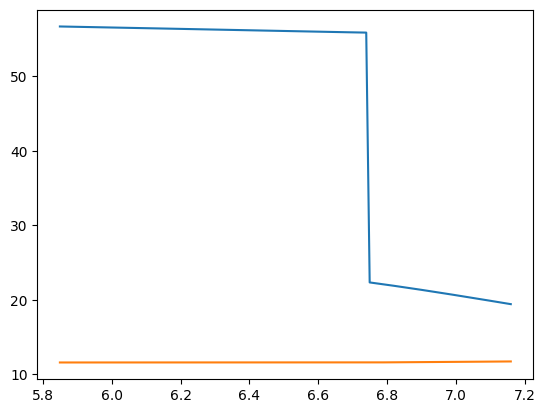

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df1['tphys'],df1['mass_1'])
plt.plot(df1['tphys'],df1['mass_2'])

## 2. YOUR TURN TO DO RESEARCH!

### 2.1 Use  what you have learned so far

#### 2.2.1 Modify your functions
The value of $\eta$ as defined above becomes imaginary if $M_{\rm BH}>3M_{\rm BH,0}$. But in practice, this equation stops being valid much earlier. Specifically, according to black hole theory $\eta$ cannot exceed a value of 0.42 (which takes place for a so-called **maximally spinning black hole**, for which the event horizon rotates at the speed of light!). Thus, $\eta$ is taken to be $0.42$
for all black hole masses of $\sqrt{6}M_{BH,0}$ and above (you cannot spin faster than a maximally spinning black hole!).

So, you need to ammend your old function below to capture this new condition on $\eta$:


In [ ]:
def calc_Lacc(Mbh,Mbh0,Mdotbh):
    eta = calc_eta(Mbh, Mbh0)
    if eta >= 0.42:
        eta = 0.42
    Mdotacc = calc_Mdotacc(Mbh, Mbh0, Mdotbh)
    Lacc = eta * Mdotacc * c**2

    return Lacc

Another ammendment that we need to implement is what called  **bolometric correction** to the luminosity. A bolometric correction is a multiplicative factor that accounts for differences between the visible luminosity that we observe and the true brightness of the observed source. For binaries with accreting black holes, this correction is $0.8$. Copy and paste your old function below, and then multiply your final accretion luminosity by this factor before returning it.

In [ ]:
def calc_Lacc_corr(Mbh,Mbh0,Mdotbh):
    eta = calc_eta(Mbh, Mbh0)
    if eta >= 0.42:
        eta = 0.42
    Mdotacc = calc_Mdotacc(Mbh, Mbh0, Mdotbh)
    Lacc = 0.8*eta * Mdotacc * c**2

    return Lacc

What is the value of $L_{\rm acc}$ for the same values as above ( $M_{\rm BH} = 11.645$ M$_{\odot}$, $M_{\rm BH,0} = 11.611$ M$_{\odot}$, $\dot{M}_{\rm BH} = 3.026\times10^{-7} M_{\odot}$ yr$^{-1}$) now that you have ammended your function?

In [ ]:
c = 3e10
Msun = 1.98847e33
Mbh = 11.645 * Msun
Mbh0 = 11.611 * Msun
Mdotbh = 3.026e-7 * Msun/yr_to_s
Lacc = calc_Lacc(Mbh,Mbh0,Mdotbh)
Lacc_corr = calc_Lacc_corr(Mbh,Mbh0,Mdotbh)


print(f'The old value of L_acc is {Lacc:.5e} erg/s.')
print(f'The corrected value of L_acc is {Lacc_corr:.5e} erg/s.')

The old value of L_acc is 1.04761e+39 erg/s.
The corrected value of L_acc is 8.38086e+38 erg/s.


#### 2.2.2 Apply your functions to datasets

We want to apply your function ``calc_Lacc`` to the data frame ``df1`` that contains the dataset ``cosmic_data_1.csv``.

Since the secondary is the accreting black hole, the parameters we need are ```mass_2``` and ```deltam_2```. One way we can acquire luminosity information is to loop through the dataframe, row by row, and calculate the luminosity at each time step using our function.

First, write a ```for``` loop that goes through each row of the data frame and applies your luminosity function at each iteration. We will try the pandas function ```iterrows()```.*

For example, the following loop print out the value of ```mass_2``` for each and every row in the data frame alongside the initial value of ```mass_2```

```python
for index,row in df1.iterrows():
    print(row['mass_2'],df1['mass_2'][0])
```

Now try it yourself:

In [ ]:
for index,row in df1.iterrows():
    print(row['mass_2'],df1['mass_2'][0])

11.611779387990982 11.611779387990982
11.611779801850762 11.611779387990982
11.611780221423343 11.611779387990982
11.611780646810866 11.611779387990982
11.611781078117533 11.611779387990982
11.611781515449646 11.611779387990982
11.611781958915634 11.611779387990982
11.61178240862611 11.611779387990982
11.611782864693888 11.611779387990982
11.611783327234026 11.611779387990982
11.611783796363854 11.611779387990982
11.611784272203035 11.611779387990982
11.611784754873565 11.611779387990982
11.611785244499831 11.611779387990982
11.611785741208635 11.611779387990982
11.611786245129217 11.611779387990982
11.611786756393304 11.611779387990982
11.61178727513512 11.611779387990982
11.611787801491436 11.611779387990982
11.611788335601563 11.611779387990982
11.611788877607417 11.611779387990982
11.611789427653497 11.611779387990982
11.611789985886938 11.611779387990982
11.611790552457506 11.611779387990982
11.611791127517614 11.611779387990982
11.611791711222356 11.611779387990982
11.61179230372

You can operate functions on each value of ``mass_2``. For instance, what if you want to compute ``mass_2`` to the fourth power? You can print it out like this:
```python
for index,row in df1.iterrows():
    print(row['mass_2']**4)
```
Instead of printint the result to the screen, you can save them into an array instead!
```python
import numpy as np
result = np.zeros(len(df1))
for index,row in df1.iterrows():
    result[index]=row['mass_2']**4
print(result)
```

Now it is your turn to try operating functions on the data frame

In [ ]:
import numpy as np
result = np.zeros(len(df1))
for index,row in df1.iterrows():
    result[index]=row['mass_2']**4
print(result)

[18180.05129866 18180.05389051 18180.05651814 18180.05918218
 18180.06188329 18180.06462214 18180.0673994  18180.07021577
 18180.07307195 18180.07596867 18180.07890666 18180.08188666
 18180.08490945 18180.0879758  18180.09108651 18180.09424238
 18180.09744424 18180.10069293 18180.10398931 18180.10733425
 18180.11072863 18180.11417337 18180.11766939 18180.12121762
 18180.12481901 18180.12847455 18180.13218521 18180.135952
 18180.13977594 18180.14365808 18180.14759946 18180.15160116
 18180.15566426 18180.15978987 18180.1639791  18180.16823309
 18180.172553   18180.17693998 18180.18139521 18180.18591989
 18180.19051522 18180.19518242 18180.19992273 18180.20473737
 18180.20962761 18180.2145947  18180.21963991 18180.22476451
 18180.22996978 18180.23525701 18180.24062746 18180.24608244
 18180.25162321 18180.25725106 18180.26296725 18180.26877304
 18180.27466969 18180.28065842 18180.28674045 18180.29291696
 18180.29918914 18180.30555812 18180.312025   18180.31859084
 18180.32525667 18180.3320

Now, do this for the function ``calc_Lacc`` and save your calculated luminosities in an array. Print your final array of luminosities to check that they are reasonable. Reasonable luminosities should fall between $10^{30}$ and $10^{45}$ (the units are $erg$ $s^{-1}$).


In [ ]:
print(df1.columns)

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')


In [ ]:
c = 3e10
Msun = 1.98847e33
Mbh = 11.645 * Msun
Mbh0 = 11.611 * Msun
Mdotbh = 3.026e-7 * Msun/yr_to_s
Lacc_corr = calc_Lacc_corr(Mbh,Mbh0,Mdotbh)

result = np.zeros(len(df1))
for index,row in df1.iterrows():
    Mbh = row['mass_2'] * Msun
    Mbh0 = row['mass0_2'] * Msun
    Mdotbh = row['deltam_2'] * Msun/yr_to_s
    result[index]=calc_Lacc_corr(Mbh,Mbh0,Mdotbh)
print(result)

df1['Lacc_erg_s'] = result

[7.99751164e+34 8.10771767e+34 8.21989228e+34 8.33407524e+34
 8.45030703e+34 8.56862887e+34 8.68908267e+34 8.81171105e+34
 8.93655736e+34 9.06366561e+34 9.19308053e+34 9.32484750e+34
 9.45901257e+34 9.59562244e+34 9.73472443e+34 9.87636645e+34
 1.00205970e+35 1.01674651e+35 1.03170204e+35 1.04693128e+35
 1.06243929e+35 1.07823114e+35 1.09431195e+35 1.11068688e+35
 1.12736109e+35 1.14433976e+35 1.16162808e+35 1.17923124e+35
 1.19715440e+35 1.21540274e+35 1.23398137e+35 1.25289538e+35
 1.27214978e+35 1.29174953e+35 1.31169951e+35 1.33200446e+35
 1.35266906e+35 1.37369780e+35 1.39509503e+35 1.41686492e+35
 1.43901145e+35 1.46153835e+35 1.48444908e+35 1.50774686e+35
 1.53143456e+35 1.55551469e+35 1.57998940e+35 1.60486041e+35
 1.63012896e+35 1.65579579e+35 1.68186110e+35 1.70832446e+35
 1.73518482e+35 1.76244039e+35 1.79008863e+35 1.81812615e+35
 1.84654871e+35 1.87535107e+35 1.90452697e+35 1.93406903e+35
 1.96396870e+35 1.99421615e+35 2.02480019e+35 2.05570817e+35
 2.08692592e+35 2.118437

In [ ]:
df1

,tphys,kstar_1,mass0_1,mass_1,lum_1,rad_1,teff_1,massc_1,radc_1,menv_1,...,sep,ecc,B_1,B_2,SN_1,SN_2,bin_state,merger_type,bin_num,Lacc_erg_s
0,5.849342,1.0,56.713818,56.713818,787596.997738,16.525692,42487.952371,0.0,0.0,1.000000e-10,...,1650.232223,0.136005,0.0,0.0,0.0,1.0,0,-1,0,7.997512e+34
1,5.859342,1.0,56.705120,56.705120,789273.977968,16.606999,42406.358550,0.0,0.0,1.000000e-10,...,1650.442195,0.136005,0.0,0.0,0.0,1.0,0,-1,0,8.107718e+34
2,5.869342,1.0,56.696387,56.696387,790956.584585,16.689517,42323.919771,0.0,0.0,1.000000e-10,...,1650.653092,0.136005,0.0,0.0,0.0,1.0,0,-1,0,8.219892e+34
3,5.879342,1.0,56.687617,56.687617,792644.841098,16.773275,42240.624710,0.0,0.0,1.000000e-10,...,1650.864911,0.136005,0.0,0.0,0.0,1.0,0,-1,0,8.334075e+34
4,5.889342,1.0,56.678811,56.678811,794338.771577,16.858301,42156.461900,0.0,0.0,1.000000e-10,...,1651.077646,0.136005,0.0,0.0,0.0,1.0,0,-1,0,8.450307e+34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.119342,7.0,19.745873,19.745873,666943.030529,1.477863,136293.382442,0.0,0.0,1.974587e+01,...,7.511694,0.000000,0.0,0.0,0.0,1.0,0,-1,0,7.335676e+38
128,7.129342,7.0,19.669703,19.669703,667684.287472,1.463511,136998.066132,0.0,0.0,1.966970e+01,...,7.522931,0.000000,0.0,0.0,0.0,1.0,0,-1,0,7.308437e+38
129,7.139342,7.0,19.593412,19.593412,668351.562705,1.447166,137803.974294,0.0,0.0,1.959341e+01,...,7.534483,0.000000,0.0,0.0,0.0,1.0,0,-1,0,7.267075e+38
130,7.149342,7.0,19.517013,19.517013,668945.769180,1.428629,138725.903376,0.0,0.0,1.951701e+01,...,7.546351,0.000000,0.0,0.0,0.0,1.0,0,-1,0,7.210090e+38


Now that we have the accretion luminosity data for our binary, let's plot it to see how the system's emission changes over time. Using matplotlib, make a time series plot using the ```tphys``` column from the simulation output along with your array of luminosities. Make sure to properly label your plot!B *Hint: Use a log scale when plotting your luminosities so that you can better visualize the emission behavior.*

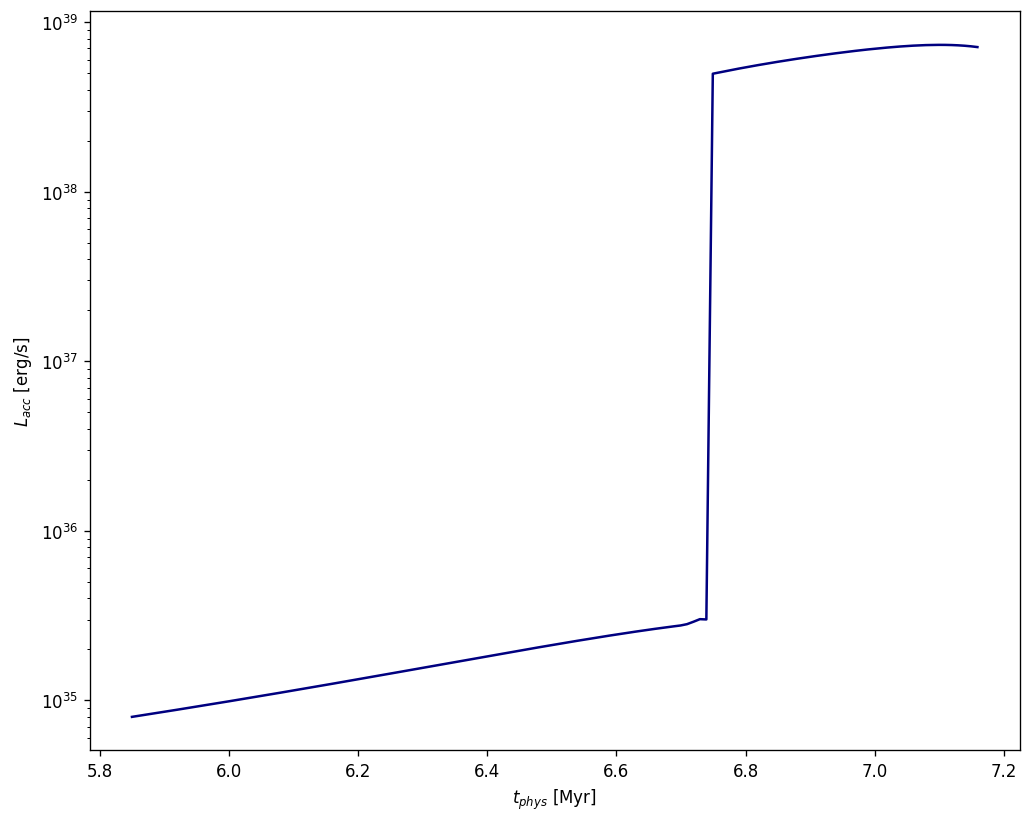

In [ ]:
plt.figure(figsize=(10,8), dpi=120)
plt.plot(df1['tphys'], df1['Lacc_erg_s'], color='navy')
plt.xlabel('$t_{phys}$ [Myr]')
plt.ylabel('$L_{acc}$ [erg/s]')
plt.yscale('log')

One question researchers might ask is if a given binary system is observable. For a system to be observed by an x-ray observatory, it must reach a maximum luminosity above an observable threshold. Let's take our observable threshold to be $10^{37} erg$ $s^{-1}$, which is a common threshold used for the Chandra Observatory. Using your calculations, find the maximum luminosity of your binary system. Is it observable?

In [ ]:
max_Lacc = np.max(df1['Lacc_erg_s'])
if max_Lacc < 10e37:
  obs = 'not observable'
elif max_Lacc >= 10e37:
  obs = 'observable'
print(f'The maximum luminosity is {max_Lacc:.5e} erg/s. The binary system is {obs}.')

The maximum luminosity is 7.35323e+38 erg/s. The binary system is observable.


### 2.2 Expand on  what you have learned so far

As it turns out, looping over dataframes using ```iterrows()``` is actually pretty slow. In the following, we will try an alternative method that we may call **"the array method**.

As an example, consider the following function ```func(y,a)```, where ```y``` is the independent variable and ```a``` is an additional parameter. Note that we define an **internal** variable ```b``` inside the function.

```python
from math import sin

def func(y,a):
    if (abs(a) < 1):
        b = 1
    else:
        b  = 2

    return sin(y/a)**b
```

Now you have multiple values of ```y``` (as you do values of mass in ```df1``` above) and **also** multiple value of ```a```:

```python
y = np.linspace(0,10,20)
a = np.random.random(20)

```
You can repeat the loop method to evaluate ```func``` for all these values of ```y``` and ```a```:

```python
for index in range(len(y)):
    result[index] = func(y[index],a[index])
```
But, as mentioned before, this approach is very slow. ```numpy```, however, should allow you to operate the function directly on the arrays and do something like:

```python
result = func(y,a)
```
but that will not work. Do you know why?


> I think it will not work because 'a' is an array and you can't take the absolute value of an array.



In [ ]:
# test that the numpy operation will not work off the bat
from math import sin

def func(y,a):
    if (abs(a) < 1):
        b = 1
    else:
        b  = 2

    return sin(y/a)**b

y = np.linspace(0,10,20)
a = np.random.random(20)

result = func(y,a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We will solve this problem using what you learned about **array slicing**. For example, let's say I have two arrays of the same size called ```x``` and ```y```. If want to know which values of ```x``` are less than their corresponding values in ```y```, you can write:

``` python
x_lower_values = x < y
```
The quantity ```x_lower_values``` is a **boolean array** or an array of zeros and ones --or yeas and nays-- telling your where x is less than y (True) and when x is not less than y (False). Similarly, there is the ```numpy``` function ```where()```.

Now rewrite the example function as:

```python
from math import sin

def func(y,a):
    b = np.ones(len(a))
    a_higher_values = a > 1

    b[a_higher_values] = 2

    return np.sin(y/a)**b
```

Alternatively, if you want to use ```where```, you could write:

```python
def func(y,a):
    b = np.ones(len(a))
    b = np.where(a > 1,2,1)
    return np.sin(y/a)**b
```
Make sure these two functions work

In [ ]:
from math import sin

def func(y,a):
    b = np.ones(len(a))
    a_higher_values = a > 1

    b[a_higher_values] = 2

    return np.sin(y/a)**b

y = np.linspace(0,10,20)
a = np.random.random(20)

result = func(y,a)

In [ ]:
def func(y,a):
    b = np.ones(len(a))
    b = np.where(a > 1,2,1)
    return np.sin(y/a)**b

y = np.linspace(0,10,20)
a = np.random.random(20)

result = func(y,a)

Now, ammend your ```calc_Lacc``` function once more such that you can call it in just one line
```python
def calc_Lacc_np(Mbh,Mbh0,Mdotbh):
    ...
```

In [ ]:
#old function for reference
def calc_Lacc_corr(Mbh,Mbh0,Mdotbh):
    eta = calc_eta(Mbh, Mbh0)
    if eta >= 0.42:
        eta = 0.42
    Mdotacc = calc_Mdotacc(Mbh, Mbh0, Mdotbh)
    Lacc = 0.8*eta * Mdotacc * c**2

    return Lacc

In [ ]:
# code your improved function here
def calc_Lacc_np(Mbh, Mbh0, Mdotbh):
    eta = np.where(Mbh > np.sqrt(6)*Mbh0, 0.42, calc_eta(Mbh, Mbh0))
    #np.where(condition, what it does if true, what it does if false)

    Mdotacc = Mdotbh/(1-eta)
    Lacc = 0.8*eta * Mdotacc * c**2

    return Lacc

Apply your new and improved function to the same data set above. You should now only need one line of code to calculate your array of accretion luminosities. Print your final array of luminosities to check that they are reasonable. *Hint: you may need to create an array for $M_{BH,0}$ that is the same length as your arrays for $M_{BH}$ and $\dot M_{BH}$ in order to pass it to your function.*

In [ ]:
Mbh = df1['mass_2'] * Msun
Mbh0 = df1['mass0_2'] * Msun
Mdotbh = df1['deltam_2'] * Msun/yr_to_s
result_Lacc_np = calc_Lacc_np(Mbh,Mbh0,Mdotbh)

Plot the accretion luminosities you obtained with the ```for``` loop method as well as those you obtained with the array method. They should agree. Make sure to properly label your plot.

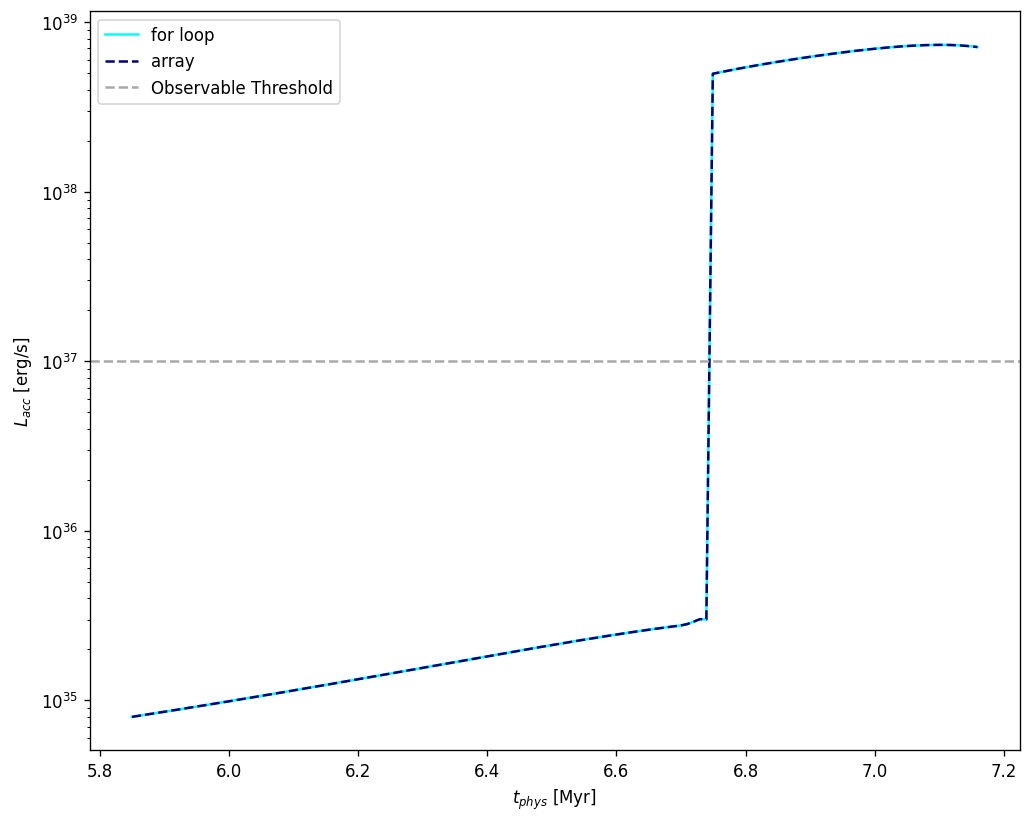

In [ ]:
plt.figure(figsize=(10,8), dpi=120)
plt.plot(df1['tphys'], df1['Lacc_erg_s'], color='cyan', label='for loop')
plt.plot(df1['tphys'], result_Lacc_np, linestyle='--', color = 'navy', label='array')
plt.axhline(1e37, linestyle='--', color='darkgray', label = 'Observable Threshold')

plt.xlabel('$t_{phys}$ [Myr]')
plt.ylabel('$L_{acc}$ [erg/s]')
plt.yscale('log')
plt.legend()

Copy and paste your pieces of code that run your different luminosity functions below. Import the python ```time``` module and use the ```time()``` function to determine the runtime of each code segment. Print both runtimes to compare them.

In [ ]:
from time import time
t1 = time() #time when the cell started

#for loop method
result = np.zeros(len(df1))
for index,row in df1.iterrows():
    Mbh = row['mass_2'] * Msun
    Mbh0 = row['mass0_2'] * Msun
    Mdotbh = row['deltam_2'] * Msun/yr_to_s
    result[index]=calc_Lacc_corr(Mbh,Mbh0,Mdotbh)

t2 = time() #time when the for loop method ended

#array method
Mbh = df1['mass_2'] * Msun
Mbh0 = df1['mass0_2'] * Msun
Mdotbh = df1['deltam_2'] * Msun/yr_to_s
result_Lacc_np = calc_Lacc_np(Mbh,Mbh0,Mdotbh)

t3 = time() #time when the array method ended

for_loop_time = t2-t1
array_time = t3-t2

print(f'The for loop method took {for_loop_time:.5f} seconds.')
print(f'The array method took {array_time:.5f} seconds.')

The for loop method took 0.01444 seconds.
The array method took 0.00219 seconds.


In [ ]:
print(f'The array method was {for_loop_time/array_time:.2f} times faster than the for loop method')

The array method was 6.58 times faster than the for loop method


Even though the difference in runtimes may seem small, it is actually quite noticeable when applied to many systems. Calculate how long each method would take to analyze the luminosities of a full population of 50,000 binaries. What's the computing time in hours?

In [ ]:
many_for_loop = for_loop_time*50000/3600 #/3600 because there are 3600 seconds in one hour
many_array = array_time*50000/3600

print(f'The for loop method would take {many_for_loop:.5f} hours for one full population.')
print(f'The array method would take {many_array:.5f} hours for one full population.')

The for loop method would take 0.20049 hours for one full population.
The array method would take 0.03047 hours for one full population.


Now, suppose we run a total of 10 different simulations, and need to analyze the luminosities of all systems in each simulation. How long does each method take to complete these calculations? Were the improvements to your luminosity function worth it?

In [ ]:
print(f'The for loop method would take {10*many_for_loop:.5f} hours for ten full populations.')
print(f'The array method would take {10*many_array:.5f} hours for ten full populations.')

The for loop method would take 2.00490 hours for ten full populations.
The array method would take 0.30471 hours for ten full populations.


## 3. BONUS RESEARCH PROJECT

The file ```cosmic_data_1.csv``` is actually a very small portion of a full simulation output file. Now, read-in the simulation data file ```cosmic_data_2.csv```, also located in this project folder, and store it as a ```pandas``` dataframe (it may take a couple of minutes to upload). Open the file and examine its format, including column titles, the number of rows, etc.

```python
df2 = pd.read_csv('cosmic_data_2.csv')
print(df2.columns)
```

In [ ]:
# read-in your data frame here
df2 = pd.read_csv('cosmic_data_2.csv')
print(df2.columns)

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')


In [ ]:
df1.shape

(132, 40)

In [ ]:
df2.shape

(27515, 39)

This file is clearly far more massive than the previous one - and it is still a reduced version of the full simulation output!

The bonus portion of this project involves identifying the x-ray binary phase of the system and applying our luminosity function to the appropriate subset of the extended data file.

First, we need to identify when the x-ray binary phase begins. We can do this by finding the timestep when the first black hole is formed, which is recorded in the ```kstar_1``` and ```kstar_2``` columns of the data file. If ```kstar_1``` or ```kstar_2``` equals $14$, then that respective object is a black hole. The x-ray binary phase begins when the first black hole's accretion rate becomes greater than zero.

We will use the ```numpy.where()``` function to identify **3 separate instances** of interest in the evolution of this binary:
* The time (or array index) at which one of the two stars first becomes a black hole.
* The time (or array index) at which the first black hole to form starts to accrete (gain) mass.
* The time (or array index) at which the first black hole to form ceases to accrete mass.

Write a piece of code that identifies the timestep or index of the data file at which each object in the binary becomes a black hole. Store each index as a variable. Then compare the indices or timesteps you found and determine which black hole formed first. Do both Object 1 and Object 2 become black holes?

In [ ]:
# Use np.where() to find where in the dataframe the quantities kstar_1 and kstar_2 are equal to 14
print(np.where(df2['kstar_1']==14)[0][0]) # I do [0][0] after np.where(...) to find the first time the condition is true
print(np.where(df2['kstar_2']==14)[0][0])

128
12


Now, identify the indices that correspond to the beginning and end of the mass accretion phase. This is the **x-ray binary phase**. Do both Object 1 and Object 2 experience a period of mass accretion?

In [ ]:
# code here
print(np.where(df2['deltam_1']>0))
print(np.where(df2['deltam_2']>0))

(array([], dtype=int64),)
(array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),)


Create 3 variables $M_{BH}$, $M_{BH,0}$ and $\dot{M}_{BH}$, and using ```if``` statements, assign to them the corresponding columns of Object 1 or Object 2 **during the x-ray binary (mass accretion)  phase**. Hint: use indexing to select only the relevant part of each column

In [ ]:
# code here
Mbh_df2 = df2['mass_2'][12:128]*Msun
Mbh0_df2 = df2['mass0_2'][12:128]*Msun
Mdotbh_df2 = df2['deltam_2'][12:128]*Msun/yr_to_s

Using your numpy-compatible function, calculate the accretion luminosity of the binary during the x-ray binary phase, and print the resulting array of luminosities. Determine if this system is observable.

In [ ]:
# code here
Lacc_df2 = calc_Lacc_np(Mbh_df2, Mbh0_df2, Mdotbh_df2)
print(Lacc_df2)

12     8.463995e+29
13     8.596285e+29
14     8.726014e+29
15     8.858222e+29
16     8.992959e+29
           ...     
123    6.402225e+38
124    6.384631e+38
125    6.355596e+38
126    6.313889e+38
127    6.258181e+38
Name: deltam_2, Length: 116, dtype: float64


In [ ]:
print(Lacc_df2.max())

6.409514287739912e+38


> This system is observable because Lacc_max is > 1e37.

As a last step, compare your new luminosities to those you found above with the ```cosmic_data_1.csv``` data set. Use ```matplotlib``` to plot a time series of the binary emission over time, and label your plot accordingly. *Hint: you will need to apply the same cuts to the ```tphys``` column of ```cosmic_data_2.csv``` that you applied to your luminosity input parameters in order to plot your luminosities.*

What are some similarities and differences between the emission of the first and second binary system?

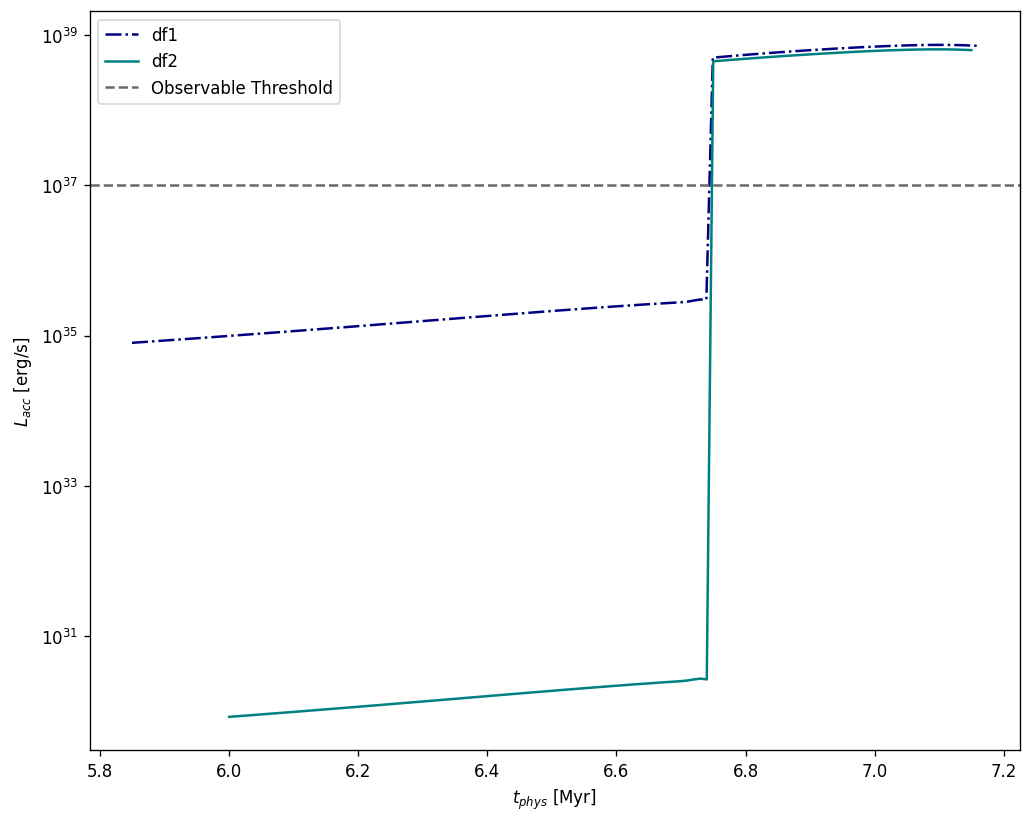

In [ ]:
plt.figure(figsize=(10,8), dpi=120)
plt.plot(df1['tphys'], result_Lacc_np, linestyle='-.', color = 'navy', label='df1')
plt.plot(df2['tphys'][12:128], Lacc_df2, color='teal', label = 'df2')
plt.axhline(1e37, linestyle='--', color='dimgray', label = 'Observable Threshold')

plt.xlabel('$t_{phys}$ [Myr]')
plt.ylabel('$L_{acc}$ [erg/s]')
plt.yscale('log')
plt.legend()

Congratulations, you have completed this project! I hoped you have learned some new information about x-ray binary systems, and have also sharpened your coding skills by experimenting with computational methods commonly used in research. If you are looking for more challenges, ask Camille and she will happily give you some!